# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Observation: Here, we can see unique values of data.

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation: Here, we can see most of the data are in object type.

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation: Here, we can see there is no any null values in data.

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
1170.55     1
1625        1
1215.45     1
973.95      1
341.6       1
Name: TotalCharges, Length: 6531, dtype: int64

Observation: Here, we can see there is some empty value so we have to change them.

In [10]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [12]:
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
           ..
4512.7      1
1083        1
1170.55     1
1625        1
8425.3      1
Name: TotalCharges, Length: 6530, dtype: int64

Observation: Here, we can fill empty space with nan value.

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df['TotalCharges'].dtype

dtype('float64')

In [15]:
df['TotalCharges'].isnull().sum()

11

Observation: Here, we can see that there are total 11 null value present in TotalCharges column.

In [16]:
# filling null values with mean of totalcharges column:
np.mean(df['TotalCharges'])

2283.3004408418697

In [17]:
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [18]:
df.iloc[6670, :]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

In [19]:
df_nominal = df.drop(['customerID','TotalCharges'], axis = 1)
df_nominal

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [20]:
df_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

# Data Visualizaton:

Male      3555
Female    3488
Name: gender, dtype: int64


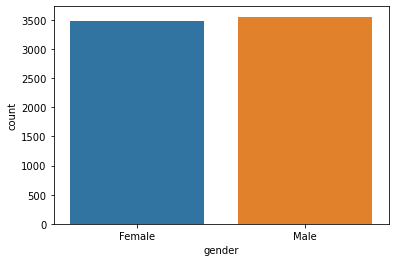

In [21]:
ax = sns.countplot(x = 'gender', data = df_nominal)
print(df_nominal['gender'].value_counts())

Observation: Here, we can see visualization of gender column in male and female category.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


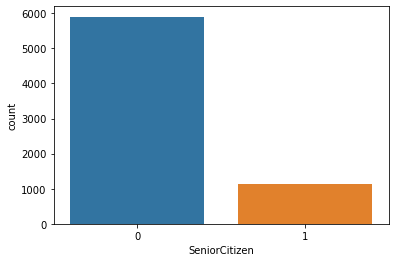

In [22]:
sns.countplot(x = 'SeniorCitizen', data = df_nominal)
print(df_nominal['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


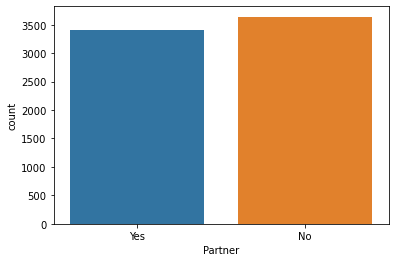

In [23]:
ax = sns.countplot(x = 'Partner', data = df_nominal)
print(df_nominal['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


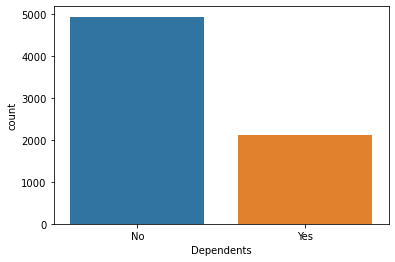

In [24]:
ax = sns.countplot(x = 'Dependents', data = df_nominal)
print(df_nominal['Dependents'].value_counts())

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


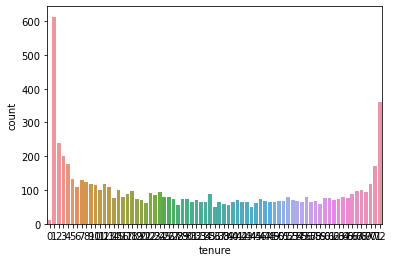

In [25]:
ax = sns.countplot(x = 'tenure', data = df_nominal)
print(df_nominal['tenure'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


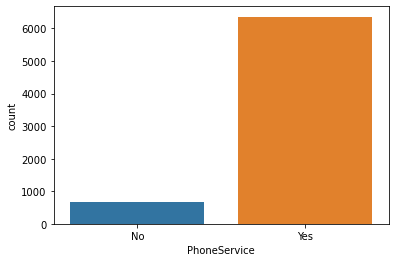

In [26]:
ax = sns.countplot(x = 'PhoneService', data = df_nominal)
print(df_nominal['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


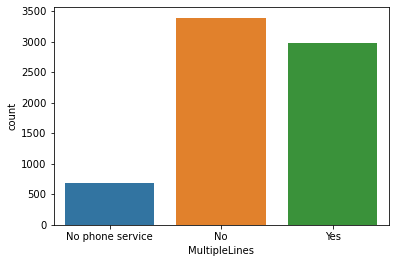

In [27]:
ax = sns.countplot(x = 'MultipleLines', data = df_nominal)
print(df_nominal['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


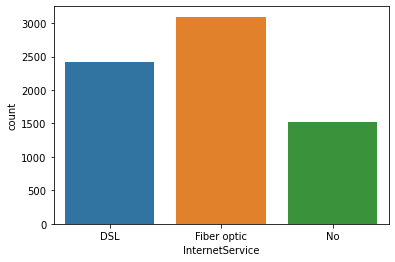

In [28]:
ax = sns.countplot(x = 'InternetService', data = df_nominal)
print(df_nominal['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


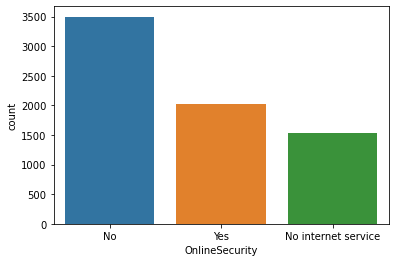

In [29]:
ax = sns.countplot(x = 'OnlineSecurity', data = df_nominal)
print(df_nominal['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


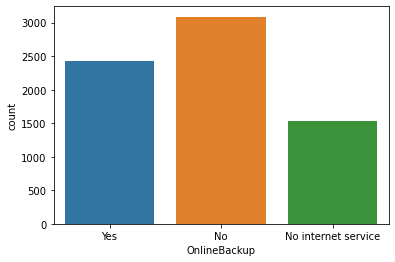

In [30]:
ax = sns.countplot(x = 'OnlineBackup', data = df_nominal)
print(df_nominal['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


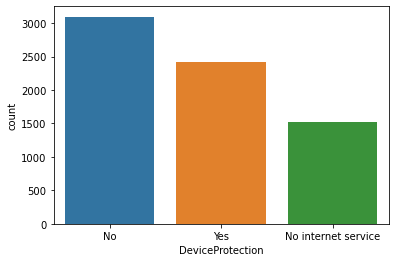

In [31]:
ax = sns.countplot(x = 'DeviceProtection', data = df_nominal)
print(df_nominal['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


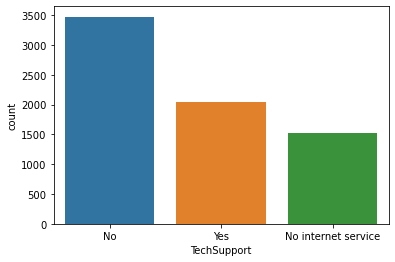

In [32]:
ax = sns.countplot(x = 'TechSupport', data = df_nominal)
print(df_nominal['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


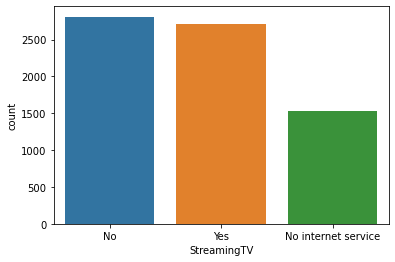

In [33]:
ax = sns.countplot(x = 'StreamingTV', data = df_nominal)
print(df_nominal['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


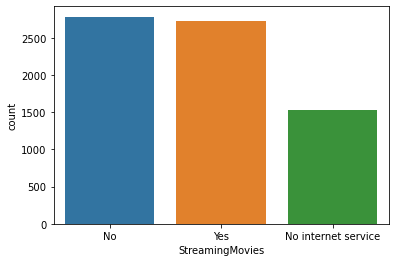

In [34]:
ax = sns.countplot(x = 'StreamingMovies', data = df_nominal)
print(df_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


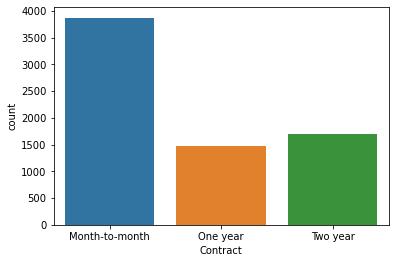

In [35]:
ax = sns.countplot(x = 'Contract', data = df_nominal)
print(df_nominal['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


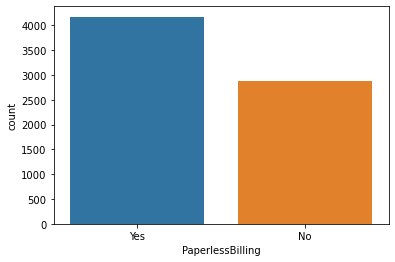

In [36]:
ax = sns.countplot(x = 'PaperlessBilling', data = df_nominal)
print(df_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


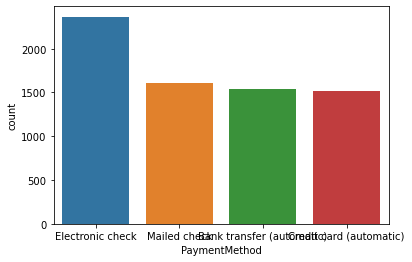

In [37]:
ax = sns.countplot(x = 'PaymentMethod', data = df_nominal)
print(df_nominal['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


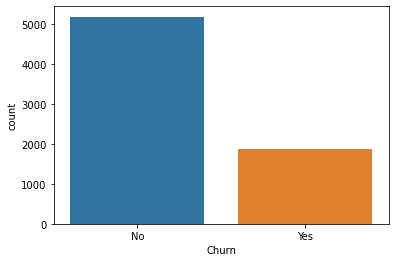

In [38]:
ax = sns.countplot(x = 'Churn', data = df_nominal)
print(df_nominal['Churn'].value_counts())

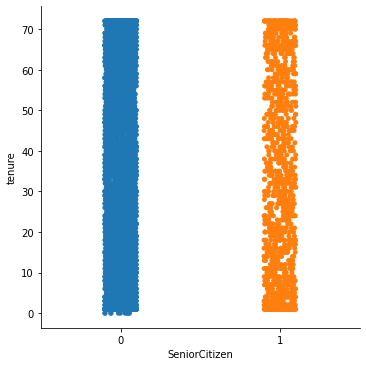

In [39]:
sns.catplot(x = 'SeniorCitizen', y = 'tenure', data = df);

In [40]:
df_continuous = df[['MonthlyCharges', 'TotalCharges']].copy()

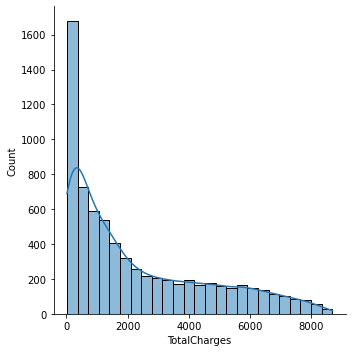

In [41]:
sns.displot(df_continuous['TotalCharges'], kde = True);

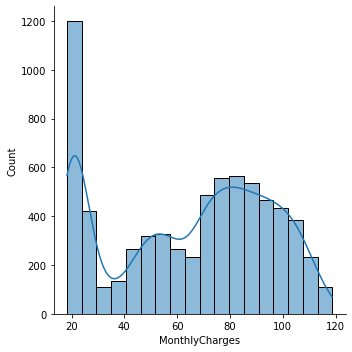

In [42]:
sns.displot(df_continuous['MonthlyCharges'], kde = True);

# Lable Encoding:

In [43]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [44]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1, 1))
        
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Describe the dataset:

In [45]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Calculation Correlation:

In [46]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


In [47]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

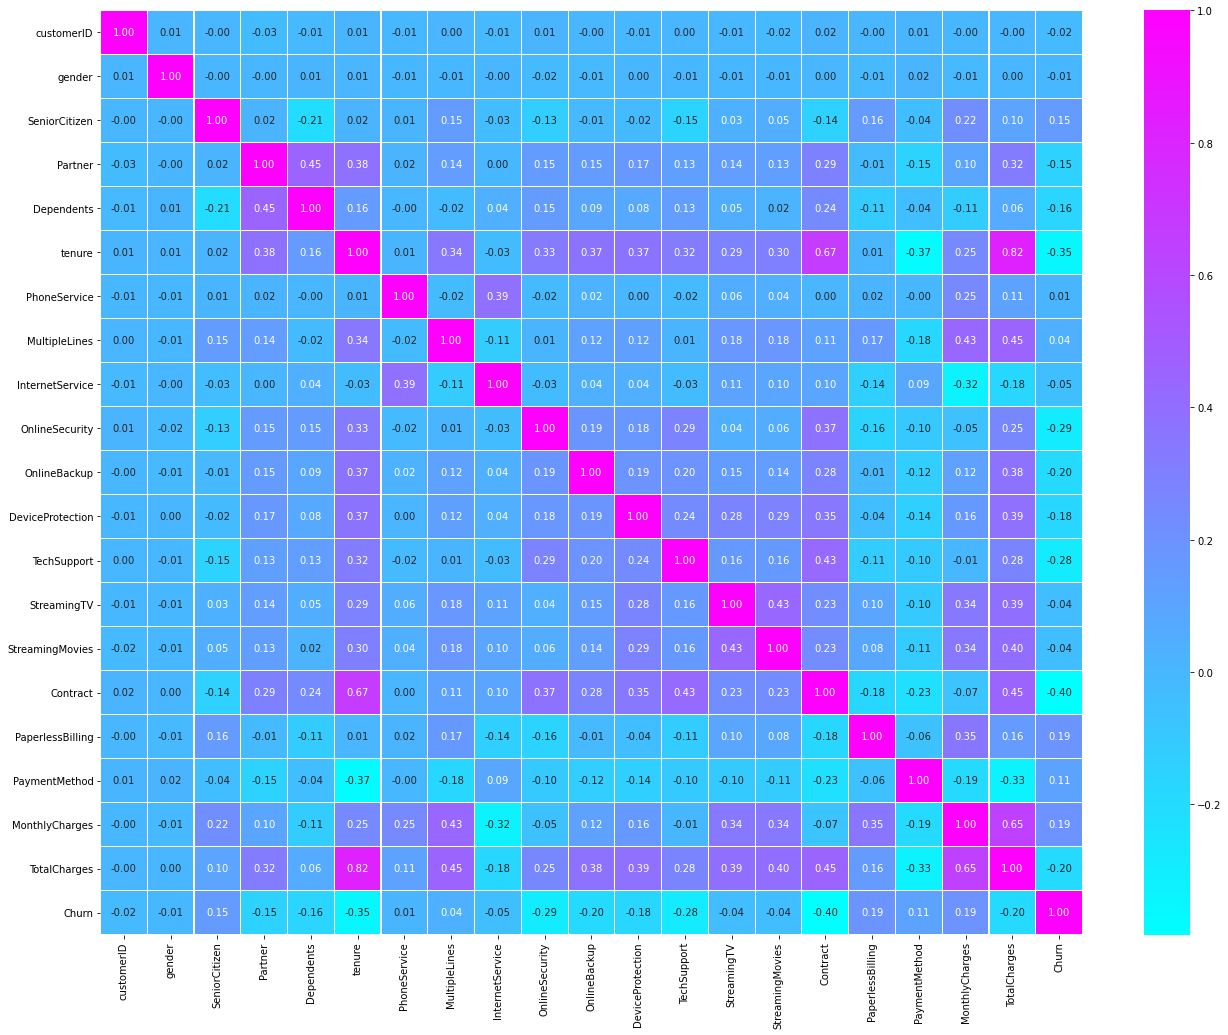

In [48]:
plt.figure(figsize = (22, 17))
sns.heatmap(df.corr(), cmap = 'cool',annot = True, linewidths = 0.1,  fmt = '0.2f')

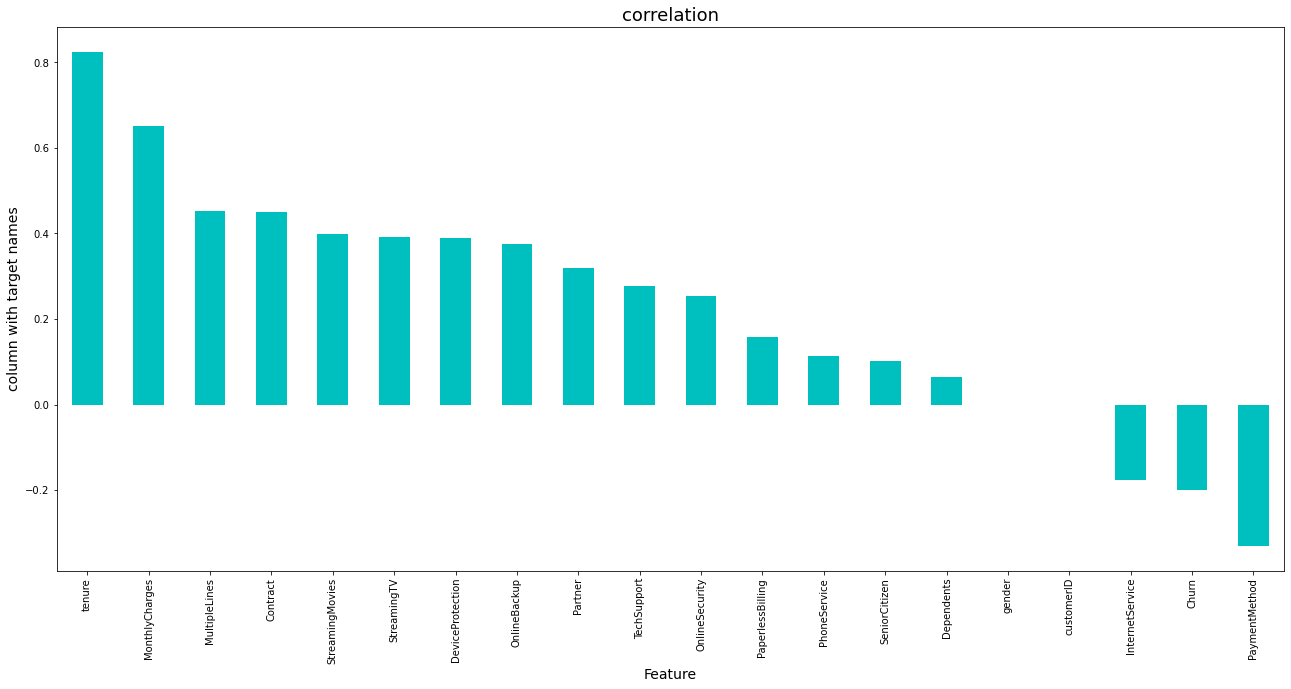

In [49]:
plt.figure(figsize = (22, 10))
df.corr()['TotalCharges'].sort_values(ascending = False).drop(['TotalCharges']).plot(kind ='bar', color = 'c')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('column with target names', fontsize = 14)
plt.title('correlation', fontsize = 18)
plt.show()

In [50]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Checking Outliers:

In [51]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

<AxesSubplot:>

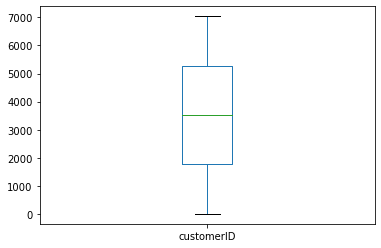

In [52]:
df['customerID'].plot.box()

<AxesSubplot:>

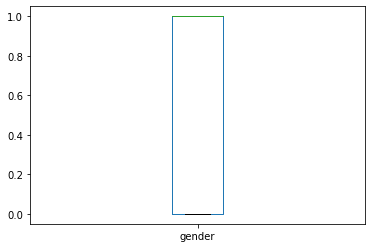

In [53]:
df['gender'].plot.box()

<AxesSubplot:>

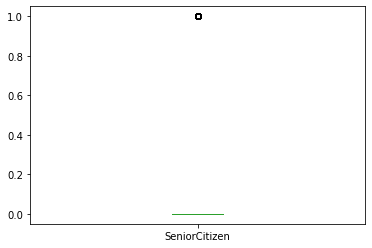

In [54]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

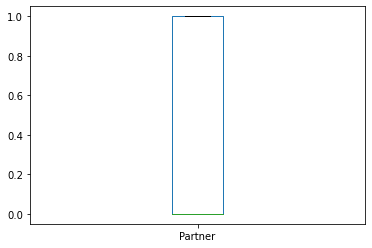

In [55]:
df['Partner'].plot.box()

<AxesSubplot:>

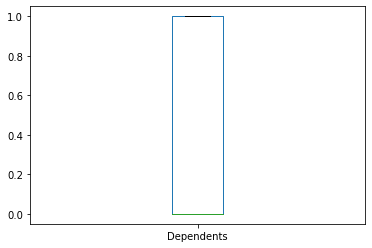

In [56]:
df['Dependents'].plot.box()

<AxesSubplot:>

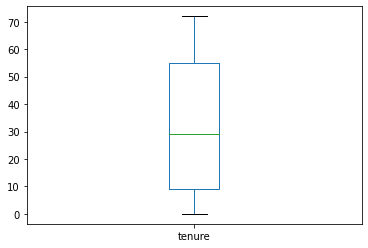

In [57]:
df['tenure'].plot.box()

<AxesSubplot:>

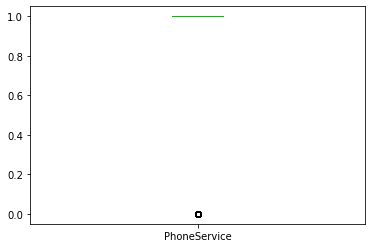

In [58]:
df['PhoneService'].plot.box()

<AxesSubplot:>

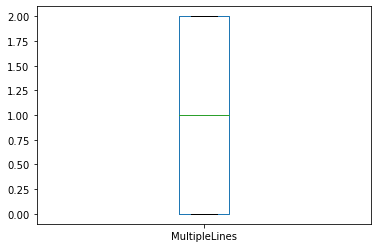

In [59]:
df['MultipleLines'].plot.box()

<AxesSubplot:>

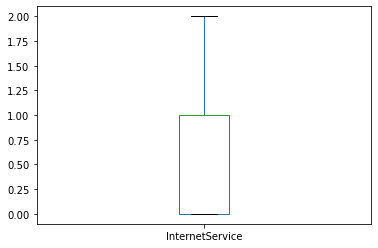

In [60]:
df['InternetService'].plot.box()

<AxesSubplot:>

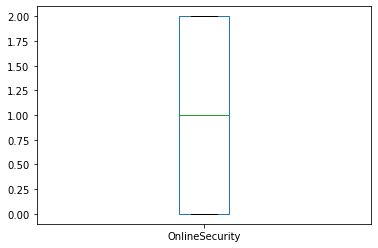

In [61]:
df['OnlineSecurity'].plot.box()

<AxesSubplot:>

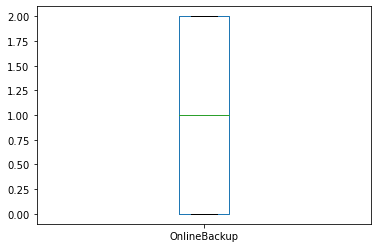

In [62]:
df['OnlineBackup'].plot.box()

<AxesSubplot:>

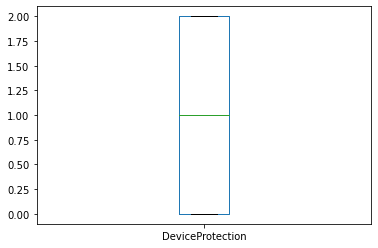

In [63]:
df['DeviceProtection'].plot.box()

<AxesSubplot:>

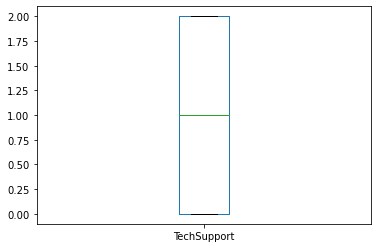

In [64]:
df['TechSupport'].plot.box()

<AxesSubplot:>

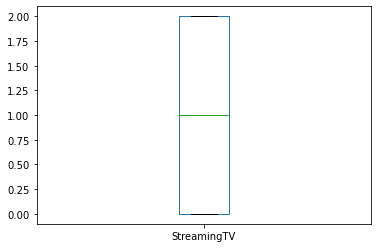

In [65]:
df['StreamingTV'].plot.box()

<AxesSubplot:>

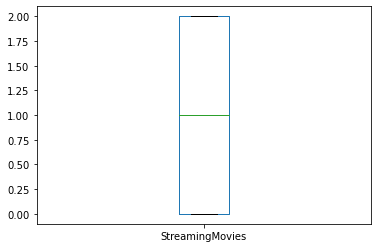

In [66]:
df['StreamingMovies'].plot.box()

<AxesSubplot:>

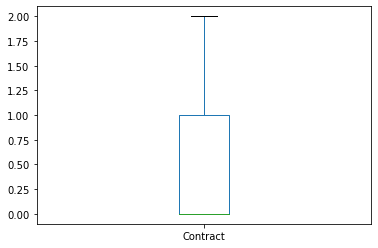

In [67]:
df['Contract'].plot.box()

<AxesSubplot:>

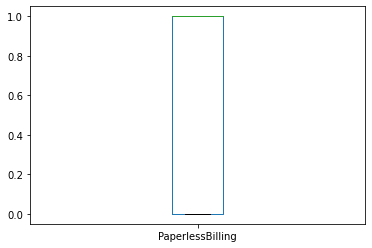

In [68]:
df['PaperlessBilling'].plot.box()

<AxesSubplot:>

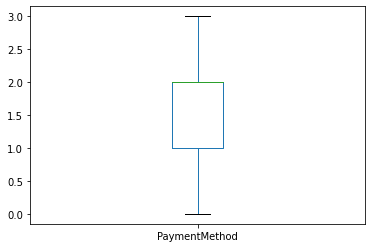

In [69]:
df['PaymentMethod'].plot.box()

<AxesSubplot:>

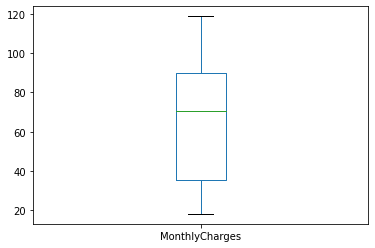

In [70]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

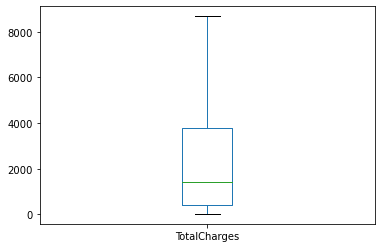

In [71]:
df['TotalCharges'].plot.box()

# Removing Outliers:

In [72]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [73]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [74]:
df_new_z.shape

(6361, 21)

# Finding % of data loss:

In [75]:
Data_loss = ((7043 - 6361)/7043)*100
Data_loss

9.683373562402386

# Separating the columns into features and target:

In [76]:
features = df.drop('TotalCharges', axis = 1)
target = df['TotalCharges']

# Scaling the data using Min-Max Scaler:

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [78]:
for i in range(0, 100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = i)
    lr.fit(features_train, target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(target_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is :- {r2_score(target_test, pred_test)}')
    print('\n')    

At random state 0, the training accuracy is :- 0.9058706722803965
At random state 0, the testing accuracy is :- 0.8977317673785853


At random state 1, the training accuracy is :- 0.9052277082152647
At random state 1, the testing accuracy is :- 0.9003132716690803


At random state 2, the training accuracy is :- 0.9056858398935237
At random state 2, the testing accuracy is :- 0.8984735750686543


At random state 3, the training accuracy is :- 0.9044956724241888
At random state 3, the testing accuracy is :- 0.9032713403489678


At random state 4, the training accuracy is :- 0.9031354749784841
At random state 4, the testing accuracy is :- 0.9085937883962479


At random state 5, the training accuracy is :- 0.9026338340566922
At random state 5, the testing accuracy is :- 0.9101290251842342


At random state 6, the training accuracy is :- 0.9028087364691222
At random state 6, the testing accuracy is :- 0.9097783155230829


At random state 7, the training accuracy is :- 0.9030731852162728
At 

At random state 63, the training accuracy is :- 0.9048964501700321
At random state 63, the testing accuracy is :- 0.9014758874088666


At random state 64, the training accuracy is :- 0.9045170165947284
At random state 64, the testing accuracy is :- 0.9031967303238563


At random state 65, the training accuracy is :- 0.9045009415426986
At random state 65, the testing accuracy is :- 0.9032852823020272


At random state 66, the training accuracy is :- 0.9064055684861096
At random state 66, the testing accuracy is :- 0.8953698509727254


At random state 67, the training accuracy is :- 0.9057993770221395
At random state 67, the testing accuracy is :- 0.898050834773779


At random state 68, the training accuracy is :- 0.9044724983486806
At random state 68, the testing accuracy is :- 0.9035221768135269


At random state 69, the training accuracy is :- 0.90348558752445
At random state 69, the testing accuracy is :- 0.9071884489486348


At random state 70, the training accuracy is :- 0.90544043

In [79]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 12 )

In [80]:
# train the model
lr.fit(features_train, target_train)

LinearRegression()

In [81]:
pred_test = lr.predict(features_test)

In [82]:
print(r2_score(target_test, pred_test))

0.9042173834952025


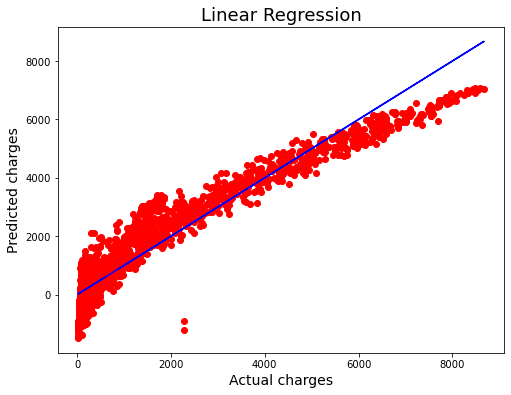

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x = target_test, y = pred_test, color = 'r')
plt.plot(target_test, target_test, color = 'b')
plt.xlabel('Actual charges', fontsize = 14)
plt.ylabel('Predicted charges', fontsize = 14)
plt.title('Linear Regression', fontsize = 18);

# Regularization:

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [85]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(features_train, target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


Observation: Here, we are using Hyperparameter tuning

In [86]:
# final model training
ls = Lasso(alpha = 1, random_state = 0)
ls.fit(features_train, target_train)
ls_score_training = ls.score(features_train, target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

90.42835075238867

In [87]:
lss = r2_score(target_test, pred_ls)
lss*100

90.42026267132482

In [88]:
cv_score = cross_val_score(ls, features, target, cv = 5)
cv_mean = cv_score.mean()
cv_mean*100

90.36629382160928

# Ensemble Technique:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(features_train, target_train)
print(clf.best_params_)

In [ ]:
rf = RandomForestRegressor(criterion = 'mae', max_features = 'auto')
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test, pred_decision)
print('R2 Score:', rfs*100)

rfscore = cross_val_score(rf, features, target, cv = 5)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

In [ ]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [ ]:
loaded_model = pickle.load(open('churn.pkl', 'rb'))
result = loaded_model.score(fetures_test, target_test)
print(result*100)

In [ ]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:], pred_decision[:]],index = ['Predicted', 'Original'])
conclusion